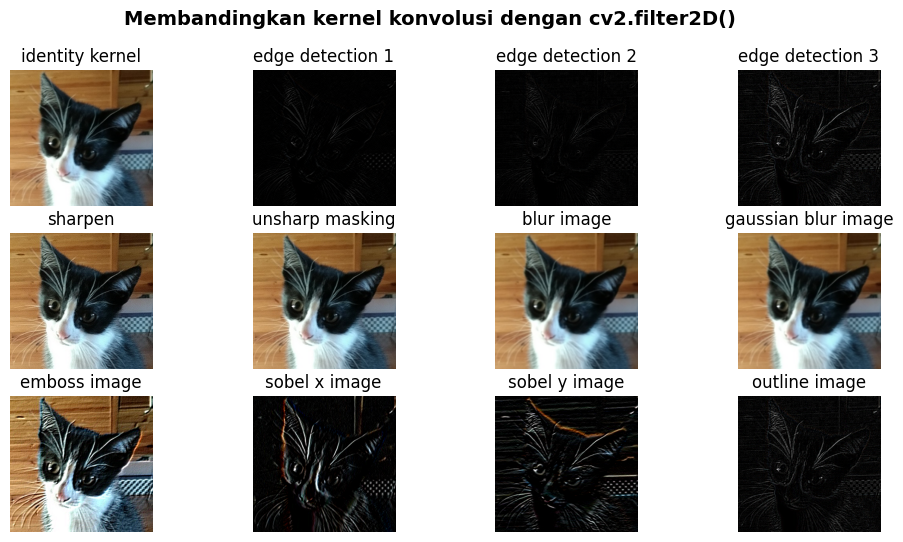

In [4]:
# menambahkan pustaka yang dibutuhkan 
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # konversi BGR ke RGB
    # pustaka matplotlib hanya bisa menampilkan format data gambar RGB 
    # matplotlib digunakan agar bisa menampilkan banyak gambar dalam 1 jendela
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# membuat jendela untuk menampilkan gambar dengan matplotlib
plt.figure(figsize=(12, 6))
plt.suptitle("Membandingkan kernel konvolusi dengan cv2.filter2D()", fontsize=14, fontweight='bold')

# membuka file gambar yang akan dikonvolusikan
image = cv2.imread('cat-face.png')

# mencoba kernel identitas
kernel_identity = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

# mencoba kernel untuk deteksi tepi
kernel_edge_detection_1 = np.array([[1, 0, -1],
                                    [0, 0, 0],
                                    [-1, 0, 1]])

kernel_edge_detection_2 = np.array([[0, 1, 0],
                                    [1, -4, 1],
                                    [0, 1, 0]])

kernel_edge_detection_3 = np.array([[-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]])

# mencoba kernel untuk penajaman
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

kernel_unsharp_masking = -1 / 256 * np.array([[1, 4, 6, 4, 1],
                                              [4, 16, 24, 16, 4],
                                              [6, 24, -476, 24, 6],
                                              [4, 16, 24, 16, 4],
                                              [1, 4, 6, 4, 1]])

# mencoba kernel menghaluskan gambar
kernel_blur = 1 / 9 * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])

gaussian_blur = 1 / 16 * np.array([[1, 2, 1],
                                   [2, 4, 2],
                                   [1, 2, 1]])

# mencoba kernel untuk embos
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

# mencoba kernel lain untuk deteksi tepi
sobel_x_kernel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

# menerapkan kernel-kernel yang sudah dibuat tadi
original_image = cv2.filter2D(image, -1, kernel_identity)
edge_image_1 = cv2.filter2D(image, -1, kernel_edge_detection_1)
edge_image_2 = cv2.filter2D(image, -1, kernel_edge_detection_2)
edge_image_3 = cv2.filter2D(image, -1, kernel_edge_detection_3)
sharpen_image = cv2.filter2D(image, -1, kernel_sharpen)
unsharp_masking_image = cv2.filter2D(image, -1, kernel_unsharp_masking)
blur_image = cv2.filter2D(image, -1, kernel_blur)
gaussian_blur_image = cv2.filter2D(image, -1, gaussian_blur)
emboss_image = cv2.filter2D(image, -1, kernel_emboss)
sobel_x_image = cv2.filter2D(image, -1, sobel_x_kernel)
sobel_y_image = cv2.filter2D(image, -1, sobel_y_kernel)
outline_image = cv2.filter2D(image, -1, outline_kernel)

# memunculkan seluruh hasil operasi konvolusi dengan 
# gambar yang sama, tetapi kernelnya berbeda
show_with_matplotlib(original_image, "kernel identitas", 1)
show_with_matplotlib(edge_image_1, "deteksi tepi 1", 2)
show_with_matplotlib(edge_image_2, "deteksi tepi 2", 3)
show_with_matplotlib(edge_image_3, "deteksi tepi 3", 4)
show_with_matplotlib(sharpen_image, "penajaman", 5)
show_with_matplotlib(unsharp_masking_image, "unsharp masking", 6)
show_with_matplotlib(blur_image, "blur", 7)
show_with_matplotlib(gaussian_blur_image, "gaussian blur", 8)
show_with_matplotlib(emboss_image, "emboss", 9)
show_with_matplotlib(sobel_x_image, "kernel sobel x", 10)
show_with_matplotlib(sobel_y_image, "kernel sobel y", 11)
show_with_matplotlib(outline_image, "outline", 12)

#memunculkan di jendela matplotlib
plt.show()
